## Machine Learning 
### (Ranking) Ordinal Classification

Este ejemplo muestra como plantear el modelo de estimar el precio
de una vivienda en una tarea de ranking de 4 categorias ordinales

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

El paquete *datasets* trae cojuntos de prueba y utilidades para descargar o generar datasets de entrenamiento 

In [40]:
from sklearn.datasets import load_boston

In [41]:
boston_data = load_boston()

In [42]:
boston_data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [43]:
boston_df = pd.DataFrame(boston_data['data'], columns=boston_data['feature_names'])
boston_df['target'] = boston_data['target']

In [44]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Utilizamos las características y la variable objetivo directamente del diccionario disponible en la variable boston_data. Entrenameros un **arbol de regresión**.

In [45]:
features = boston_df.drop(columns='target')
target = boston_df.target

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <BarContainer object of 10 artists>)

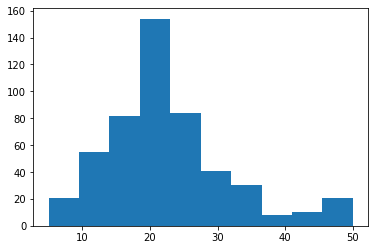

In [46]:
plt.hist(target)

Hacemos una **discretización** para transformar el problema en multi-clase con categorias ordinales. El número en el texto nos es de ayuda para poder luego ordenar esas categorias

In [47]:
target = pd.cut(target, bins=4, labels=['1_pequeña','2_media','3_grande','4_lujo'])

In [48]:
target.value_counts()

2_media      284
1_pequeña    116
3_grande      74
4_lujo        32
Name: target, dtype: int64

In [49]:
target = target.astype(str)

In [50]:
target

0        2_media
1        2_media
2       3_grande
3       3_grande
4       3_grande
         ...    
501      2_media
502      2_media
503      2_media
504      2_media
505    1_pequeña
Name: target, Length: 506, dtype: object

___

### Clasificación Ordinal como un problema de multi-clase puro

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import precision_score, accuracy_score
from sklearn.metrics import confusion_matrix
from scipy import stats

In [52]:
train_x, test_x, train_y, test_y = train_test_split(features,
                                                    target,
                                                    train_size=0.6,
                                                    stratify=target,
                                                    random_state=11
                                                    )

In [53]:
train_x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
198,0.03768,80.0,1.52,0.0,0.4040,7.274,38.3,7.3090,2.0,329.0,12.6,392.20,6.62
1,0.02731,0.0,7.07,0.0,0.4690,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
483,2.81838,0.0,18.10,0.0,0.5320,5.762,40.3,4.0983,24.0,666.0,20.2,392.92,10.42
179,0.05780,0.0,2.46,0.0,0.4880,6.980,58.4,2.8290,3.0,193.0,17.8,396.90,5.04
46,0.18836,0.0,6.91,0.0,0.4480,5.786,33.3,5.1004,3.0,233.0,17.9,396.90,14.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,0.57529,0.0,6.20,0.0,0.5070,8.337,73.3,3.8384,8.0,307.0,17.4,385.91,2.47
490,0.20746,0.0,27.74,0.0,0.6090,5.093,98.0,1.8226,4.0,711.0,20.1,318.43,29.68
426,12.24720,0.0,18.10,0.0,0.5840,5.837,59.7,1.9976,24.0,666.0,20.2,24.65,15.69
106,0.17120,0.0,8.56,0.0,0.5200,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66


In [54]:
boost = AdaBoostClassifier()

In [55]:
_ = boost.fit(train_x, train_y)

In [56]:
pred_y = boost.predict(test_x)

In [57]:
accuracy_score(test_y, pred_y)

0.6995073891625616

In [58]:
boost.classes_

array(['1_pequeña', '2_media', '3_grande', '4_lujo'], dtype=object)

In [59]:
data_conf_matrix = confusion_matrix(test_y, pred_y, labels=boost.classes_).T
pd.DataFrame(data_conf_matrix, index=boost.classes_, columns=boost.classes_)

,1_pequeña,2_media,3_grande,4_lujo
1_pequeña,35,10,0,0
2_media,11,104,30,10
3_grande,0,0,0,0
4_lujo,0,0,0,3


In [60]:
precision_score(test_y, pred_y, average='micro')

0.6995073891625616

In [61]:
precision_score(test_y, pred_y, average='macro')

/Users/ginajimenez/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.6121863799283154

In [62]:
precision_score(test_y, pred_y, average=None)

/Users/ginajimenez/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.77777778, 0.67096774, 0.        , 1.        ])

In [63]:
tau, _ = stats.kendalltau(test_y, pred_y)
tau

0.6059860375201016

____

### Clasificación ordinal con descomposición binaria 

Cada problema de clasificación binaria indica si la categoría es mayor que cierto ordinal

In [64]:
ordinal_train_y = pd.DataFrame({
    '1:>pequeña' : train_y > '1_pequeña',
    '2:>media'  : train_y > '2_media',
    '3:>grande'   : train_y > '3_grande',
})
ordinal_train_y

,1:>pequeña,2:>media,3:>grande
198,True,True,False
1,True,False,False
483,True,False,False
179,True,True,False
46,True,False,False
...,...,...,...
232,True,True,True
490,False,False,False
426,False,False,False
106,True,False,False


bucle para calcular todos los modelos y sus predicciones en train

In [65]:
ordinal_models = dict()
ordinal_preds = dict()
for iclass in ordinal_train_y.columns:
    i_target = ordinal_train_y[iclass]
    print("___")
    print(iclass)
    print(i_target)
    boost = AdaBoostClassifier(n_estimators=3)
    ordinal_models[iclass] = boost.fit(train_x, i_target)
    print(boost.classes_)
    i_label = np.where(boost.classes_ == True)[0][0]
    print(i_label)
    ordinal_preds[iclass] = boost.predict_proba(test_x)[:,i_label] 

___
1:>pequeña
198     True
1       True
483     True
179     True
46      True
       ...  
232     True
490    False
426    False
106     True
204     True
Name: 1:>pequeña, Length: 303, dtype: bool
[False  True]
1
___
2:>media
198     True
1      False
483    False
179     True
46     False
       ...  
232     True
490    False
426    False
106    False
204     True
Name: 2:>media, Length: 303, dtype: bool
[False  True]
1
___
3:>grande
198    False
1      False
483    False
179    False
46     False
       ...  
232     True
490    False
426    False
106    False
204     True
Name: 3:>grande, Length: 303, dtype: bool
[False  True]
1


In [66]:
pd.DataFrame(ordinal_preds)

,1:>pequeña,2:>media,3:>grande
0,0.999999,0.824003,0.275003
1,0.822022,0.156315,0.068833
2,0.290684,0.156315,0.187473
3,0.999999,0.156315,0.068833
4,0.290684,0.156315,0.068833
...,...,...,...
198,0.999999,0.504272,0.068833
199,0.586183,0.156315,0.068833
200,0.586183,0.275503,0.068833
201,0.999999,0.275503,0.068833


Recomponemos las probabilidades de cada categoría.  
La predicción corresponde a la categoría con mayor probabilidad

In [67]:
prob_peq = 1 - ordinal_preds['1:>pequeña']
prob_media = ordinal_preds['1:>pequeña'] - ordinal_preds['2:>media']
prob_grande = ordinal_preds['2:>media'] - ordinal_preds['3:>grande']
prob_lujo = ordinal_preds['3:>grande']

cum_pred = pd.DataFrame({'1_pequeña': prob_peq,
              '2_media': prob_media,
              '3_grande': prob_grande,
              '4_lujo': prob_lujo}, index=test_y.index)
cum_pred

,1_pequeña,2_media,3_grande,4_lujo
200,0.000001,0.175996,0.549000,0.275003
120,0.177978,0.665707,0.087482,0.068833
385,0.709316,0.134369,-0.031158,0.187473
324,0.000001,0.843684,0.087482,0.068833
425,0.709316,0.134369,0.087482,0.068833
...,...,...,...,...
88,0.000001,0.495727,0.435439,0.068833
357,0.413817,0.429869,0.087482,0.068833
165,0.413817,0.310680,0.206670,0.068833
184,0.000001,0.724496,0.206670,0.068833


In [68]:
ordinal_pred_y = cum_pred.idxmax(axis=1)
ordinal_pred_y

200     3_grande
120      2_media
385    1_pequeña
324      2_media
425    1_pequeña
         ...    
88       2_media
357      2_media
165    1_pequeña
184      2_media
15       2_media
Length: 203, dtype: object

In [69]:
pd.concat([test_y, ordinal_pred_y], axis=1)

,target,0
200,3_grande,3_grande
120,2_media,2_media
385,1_pequeña,1_pequeña
324,2_media,2_media
425,1_pequeña,1_pequeña
...,...,...
88,2_media,2_media
357,2_media,2_media
165,2_media,1_pequeña
184,2_media,2_media


In [70]:
labels = sorted(list(test_y.unique()))
labels

['1_pequeña', '2_media', '3_grande', '4_lujo']

In [71]:
ordinal_pred_y.unique()

array(['3_grande', '2_media', '1_pequeña', '4_lujo'], dtype=object)

In [72]:
data_conf_matrix = confusion_matrix(test_y, ordinal_pred_y, labels=labels).T
pd.DataFrame(data_conf_matrix, index=labels, columns=labels)

,1_pequeña,2_media,3_grande,4_lujo
1_pequeña,37,22,1,0
2_media,9,87,13,2
3_grande,0,5,14,0
4_lujo,0,0,2,11


In [73]:
precision_score(test_y, ordinal_pred_y, average='micro')

0.7339901477832512

In [74]:
precision_score(test_y, ordinal_pred_y, average='macro')

0.7458616004668637

In [75]:
precision_score(test_y, ordinal_pred_y, average=None)

array([0.61666667, 0.78378378, 0.73684211, 0.84615385])

In [76]:
tau, _ = stats.kendalltau(test_y, ordinal_pred_y)
tau

0.6819688124353489